# Image Classification With Convolutional Neural networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

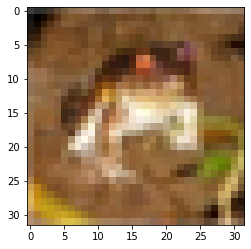

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

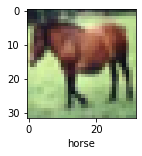

In [ ]:
plot_sample(X_train, y_train, 7)

### Normalization of data

In [ ]:
X_train = X_train/255
X_test = X_test/255

## Creating an artificial neural network for comparison with convolutional neural network

In [ ]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8109 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6241 - accuracy: 0.4255
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5438 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4834 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4343 - accuracy: 0.4950


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4940 - accuracy: 0.4690


[1.4940121173858643, 0.4690000116825104]

## Building the convolutional neural network

In [ ]:
cnn = models.Sequential([
                 layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                 layers.MaxPooling2D((2,2)),
                 layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                 layers.MaxPooling2D((2,2)),
                 layers.Flatten(input_shape=(32,32,3)),
                 layers.Dense(3000, activation='relu'),
                 layers.Dense(1000, activation='relu'),
                 layers.Dense(10,activation='softmax')   
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 17s 10ms/step - loss: 1.3601 - accuracy: 0.5078
Epoch 2/25
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9648 - accuracy: 0.6622
Epoch 3/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7351 - accuracy: 0.7405
Epoch 4/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5298 - accuracy: 0.8133
Epoch 5/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3404 - accuracy: 0.8797
Epoch 6/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2091 - accuracy: 0.9267
Epoch 7/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1535 - accuracy: 0.9464
Epoch 8/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1178 - accuracy: 0.9599
Epoch 9/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1116 - accuracy: 0.9621
Epoch 10/25
1563/1563 [==============================] - 14s 9ms/step -

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.6553 - accuracy: 0.6909


[2.655273199081421, 0.6909000277519226]